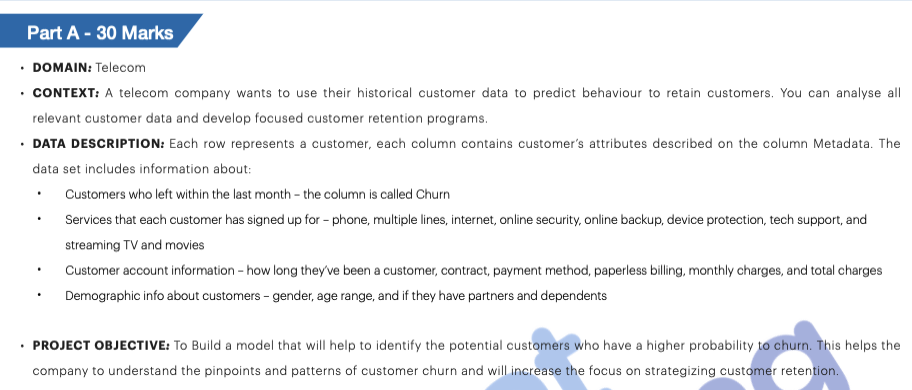



# 1. Data Understanding and Exploration

### Importing all necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier 
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pickle
%matplotlib inline

### A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. 


In [2]:
churn1=pd.read_csv("churn1.csv")

### B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.

In [3]:
churn2=pd.read_csv("churn2.csv")

### C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame 

In [4]:
churn_df=pd.merge(churn1,churn2,on='customerID')

### D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. 

In [5]:
#checking if all the columns in churn1 are there in churn_df
missing_columns=False
for i in churn1.columns:
    if i not in churn_df:
        missing_columns=True
        print(i)
        break
for i in churn2.columns:
    if i not in churn_df:
        missing_columns=True
        print(i)
        break
if missing_columns:
    print('columns are missing')
else:
    print('columns are not missing')

columns are not missing


## 2. Data Cleaning & Analysis: 

### A. impute missing/unexpected values in the DataFrame. 

In [6]:
#checking dataset
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#I see TotalCharges as object value which is not supposed to be so I am searching for any null values
for i in churn_df.TotalCharges.unique():
    if i==" ":
        print("null there")

null there


In [8]:
#removing null values
churn_df.drop(churn_df[churn_df.TotalCharges==" "].index,inplace=True,axis=0)


### B. Make sure all the variables with continuous values are of ‘Float’ type

In [9]:
#converting TotalCharges to numeric value
churn_df.TotalCharges=pd.to_numeric(churn_df.TotalCharges)

In [10]:
churn_df.TotalCharges.dtype

dtype('float64')

In [11]:
#converting all object types to categories and all continous variable to float
for i in churn_df.columns:
    if churn_df[i].dtype=="O":
        churn_df[i]=churn_df[i].astype('category')
    elif churn_df[i].dtype=="int64":
        churn_df[i]=churn_df[i].astype('float64')

In [12]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   category
 1   gender            7032 non-null   category
 2   SeniorCitizen     7032 non-null   float64 
 3   Partner           7032 non-null   category
 4   Dependents        7032 non-null   category
 5   tenure            7032 non-null   float64 
 6   PhoneService      7032 non-null   category
 7   MultipleLines     7032 non-null   category
 8   InternetService   7032 non-null   category
 9   OnlineSecurity    7032 non-null   category
 10  OnlineBackup      7032 non-null   category
 11  DeviceProtection  7032 non-null   category
 12  TechSupport       7032 non-null   category
 13  StreamingTV       7032 non-null   category
 14  StreamingMovies   7032 non-null   category
 15  Contract          7032 non-null   category
 16  PaperlessBilling  7032 n

In [13]:
#Senior Citizen is a binary value so converting this to category
churn_df.SeniorCitizen=churn_df.SeniorCitizen.astype('category')

In [14]:
#dropping customerID as it is irrelavant
churn_df.drop(['customerID'],axis=1,inplace=True)

### C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart. 

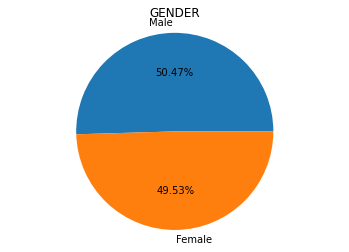

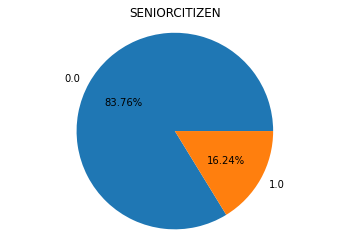

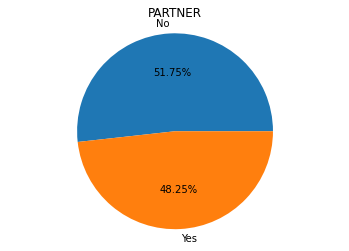

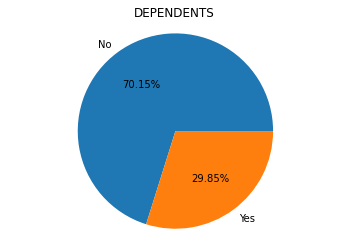

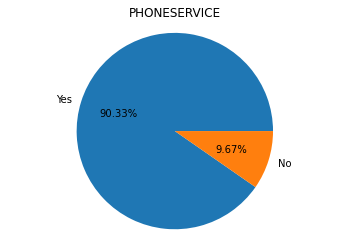

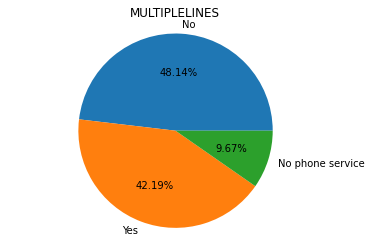

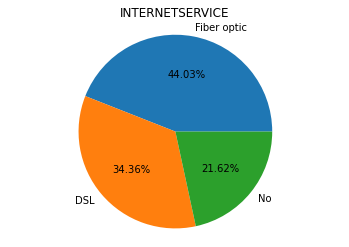

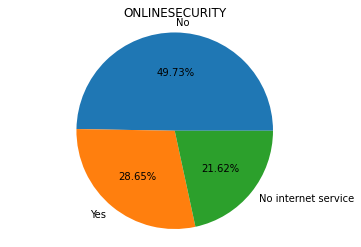

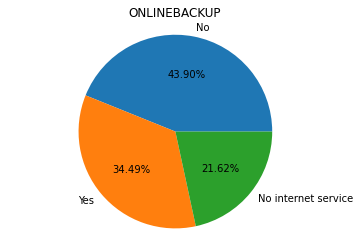

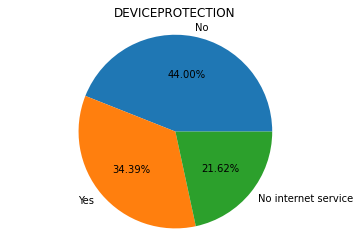

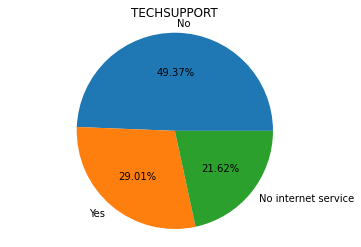

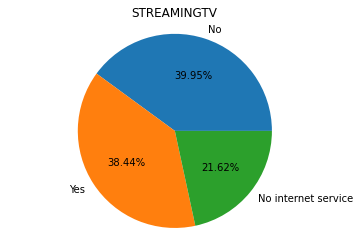

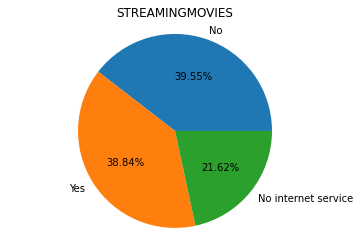

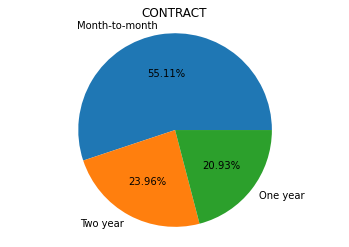

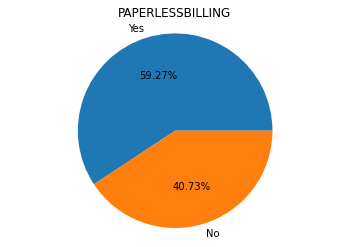

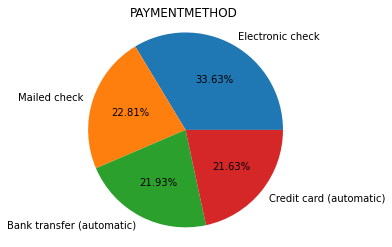

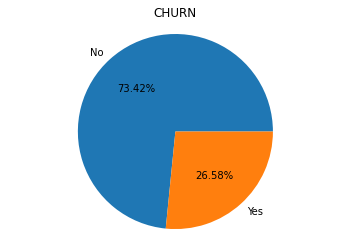

In [15]:
def getPieCharts(data):
    for i in data.columns:
        if (data[i].dtype=='category'):
            plt.pie(data[i].value_counts(),labels=data[i].value_counts().index, autopct='%1.2f%%')
            plt.title(i.upper())
            plt.axis('equal')
            plt.show()

getPieCharts(churn_df)

## D. Share insights for Q2.c 


The customers are equally distributed between men and women, there is not much difference between the proportions of men and women.

16% of the whlole sample are Senior Citizens. This indicates most of the people are part of non Senior Citizen in this sample.

Even People having Partners are almost equal to people not having partners

70% of the people has no dependents on them, this shows that most of customers of this telcom company are unmarried or live alone.

Nearly 90% of this company's customers use phone services. This shows this can be the niche of this telcom company.

42% of the customers uses multiple lines where 48% of people uses single line. This is again debatable because proportion of customers are nearly equal, but comparitively people uses a single line most often.

78% of people opted to use internet service from this company out of which is of fibre optic and 34% is of DSL network. This shows customers are also using this company's internet service but still phone service is their main area to concentrate because nearly 90% of people are using phone service.

Nearly 50% of people are not opting online security from this company, there can be two reasons, first one being that customers are not willing to take an online security service and second one can be bad reviews about online security can also lead to this state. Well only 28.65% of customers are opting internet security, this can be because there are more household users than commercial users, generally commercial users tend to have an online security for their network.

Only 34.49% of customers are willing to opt for online backup service, there are very less people opting for an online backup services.

Only 34.39% of the customers are willing to opt for deviceprotection, this shows that most of the customers believe that there is no need of external device protection from this company.

Only 29% of the customers used TechSupport, this shows that there are comparitively less issues with this company's sevcies.

Out of the internet users nearly 50% of the customers that is nearly 38% of the whole customer base opted for online streaming services, this could show us the customer's interest towards this company's services if we compare churn rate with this feature.

55% of the customers are opting for month-month billing method, this shows that most of the customers are comfortable with month-month billing method rather than having a two month contract or an year contract.

59% of the customers are willing to have a paperless billing, this shows that customers feel more comforatble with paperless billing rather than having a physical billing process.


Payment methods are kind of equally distributed but comparitively electronic checks dominates all other payment methods with 33% of the whole customer base.

Coming to churn rate 73.42 percentage of people didnot churn. This is not a good sign, this clearly shows that nearly only 1/4th of the this customer base left the telecom company last month.

### E. Encode all the appropriate Categorical features with the best suitable approach. 

In [16]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   category
 2   Partner           7032 non-null   category
 3   Dependents        7032 non-null   category
 4   tenure            7032 non-null   float64 
 5   PhoneService      7032 non-null   category
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   category
 16  PaymentMethod     7032 n

In [17]:
#LabelEncoding all the Binary categorical values as all the binary features in our dataset has only yes or no values
le=LabelEncoder()
for i in churn_df.columns:
    if len(churn_df[i].unique())==2:
        le.fit(churn_df[i])
        churn_df[i]=le.transform(churn_df[i])
        
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1.0,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34.0,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2.0,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45.0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2.0,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [18]:
#defining a function to replace all other categorical columns which are other than eligible for one hot encoding
#I've Encoded negative values of the feature as 0 because for example in MultipleLines the value "No phone service" means ultimately "No" for MultipleLines. So I followed the same for similar columns.
def replaceStruct(replace,df):
    for i in df.unique():
        if i=='Yes':
            replace[i]=1
        else:
            replace[i]=0
    return replace

In [19]:
#Defining columns for one hot encoding
oneHotCols=['InternetService','Contract','PaymentMethod']

In [20]:
#Building our replace map for all other columns than one hot encoding
replaceMaster={}
for i in churn_df.columns:
    if i not in oneHotCols:

        if churn_df[i].dtype=='category':
            replace={}
            replaceMaster[i]=replaceStruct(replace,churn_df[i])
print(replaceMaster)
        

{'MultipleLines': {'No phone service': 0, 'No': 0, 'Yes': 1}, 'OnlineSecurity': {'No': 0, 'Yes': 1, 'No internet service': 0}, 'OnlineBackup': {'Yes': 1, 'No': 0, 'No internet service': 0}, 'DeviceProtection': {'No': 0, 'Yes': 1, 'No internet service': 0}, 'TechSupport': {'No': 0, 'Yes': 1, 'No internet service': 0}, 'StreamingTV': {'No': 0, 'Yes': 1, 'No internet service': 0}, 'StreamingMovies': {'No': 0, 'Yes': 1, 'No internet service': 0}}


In [21]:
#replacing values for the columns other than one hot encoding
churn_df=churn_df.replace(replaceMaster)


In [22]:
#one hot encoding
churn_df=pd.get_dummies(churn_df,columns=oneHotCols)

In [23]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype   
---  ------                                   --------------  -----   
 0   gender                                   7032 non-null   int64   
 1   SeniorCitizen                            7032 non-null   int64   
 2   Partner                                  7032 non-null   int64   
 3   Dependents                               7032 non-null   int64   
 4   tenure                                   7032 non-null   float64 
 5   PhoneService                             7032 non-null   int64   
 6   MultipleLines                            7032 non-null   category
 7   OnlineSecurity                           7032 non-null   category
 8   OnlineBackup                             7032 non-null   category
 9   DeviceProtection                         7032 non-null   category
 10  TechSupport                         

In [24]:
#converting all binary valued columns to uint8 to save memory while processing dataset
for i in churn_df.columns:
    if churn_df[i].dtype!='float64' and churn_df[i].dtype!='unit8':
        churn_df[i]=churn_df[i].astype('uint8')
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   uint8  
 1   SeniorCitizen                            7032 non-null   uint8  
 2   Partner                                  7032 non-null   uint8  
 3   Dependents                               7032 non-null   uint8  
 4   tenure                                   7032 non-null   float64
 5   PhoneService                             7032 non-null   uint8  
 6   MultipleLines                            7032 non-null   uint8  
 7   OnlineSecurity                           7032 non-null   uint8  
 8   OnlineBackup                             7032 non-null   uint8  
 9   DeviceProtection                         7032 non-null   uint8  
 10  TechSupport                              7032 no

### G. Normalize/Standardize the data with the best suitable approach.

In [25]:
#I am using MinMaxScaler to Normalise the data to make them fall between 0 and 1 
Scaler=MinMaxScaler()
churn_df.tenure=Scaler.fit_transform(churn_df[['tenure']])
churn_df.MonthlyCharges=Scaler.fit_transform(churn_df[['MonthlyCharges']])
churn_df.TotalCharges=Scaler.fit_transform(churn_df[['TotalCharges']])

### F. Split the data into 80% train and 20% test. 

In [26]:
#TrainTestSplit

#dropping Churn column for feature data
X=churn_df.drop('Churn',axis=1)

#getting churn column for target data
y=churn_df.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. Model building and Improvement

### A. Train a model using XGBoost. Also print best performing parameters along with train and test performance.

In [27]:
#defining a function to plot all metrics
def plot_metrics(y_true, y_pred):
    # Calculate metrics
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Create crosstab
    metrics_df = pd.DataFrame({
        'Accuracy': [acc],
        'Precision': [prec],
        'Recall': [rec],
        'F1': [f1]
    })

    # Plot crosstab
    plt.figure(figsize=(8, 4))
    sns.heatmap(metrics_df, annot=True, cmap='Blues', fmt='.2f')
    plt.title('Model Performance Metrics')
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.show()



#Creating a base XGBClassifier model
xgb_model=xgb.XGBClassifier()

#Training the base model with train data
xgb_model.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

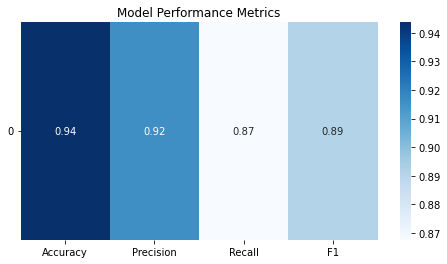

In [28]:
#making prediction on train data
y_pred=xgb_model.predict(X_train)
plot_metrics(y_train,y_pred)

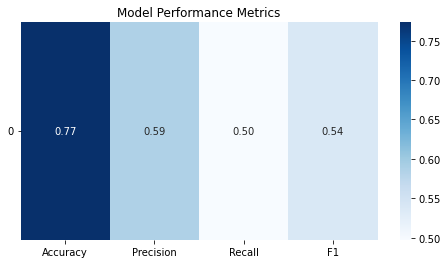

In [29]:
#making prediction on test data
y_pred=xgb_model.predict(X_test)
plot_metrics(y_test, y_pred)

### B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance. 

{'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50}


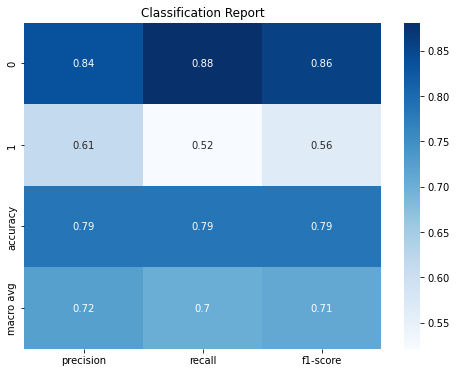

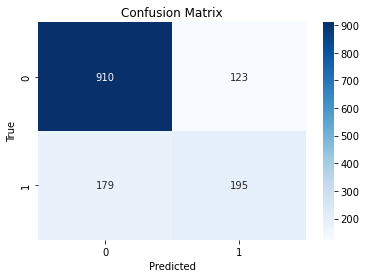

In [30]:
# Defining the parameter grid
params = {
    'n_estimators':[50,100,150],
    'learning_rate': [0.01, 0.1, 0.5], 
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.2, 0.4, 0.6, 0.8],
    #'subsample': [0.5, 0.7, 0.9]
}

# Creating an XGBoost classifier object
xgb_model = xgb.XGBClassifier()

# Creating the GridSearchCV object
grid_search = GridSearchCV(xgb_model, params, cv=5, scoring='recall', n_jobs=-1)

# Training the GridSearchCV object on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by GridSearchCV
print(grid_search.best_params_)


# Use the best model to make predictions on the validation set
y_pred = grid_search.predict(X_test)

# Evaluate the performance of the best model on the validation set
report=classification_report(y_test, y_pred, output_dict=True)
# Convert report to a pandas dataframe
df_report = pd.DataFrame(report).transpose()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()


# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues',fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


-------------------TRAIN PERFORMANCE--------------------


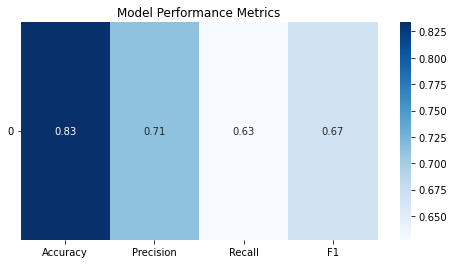

---------------------------------------------------------
-------------------TEST PERFORMANCE--------------------


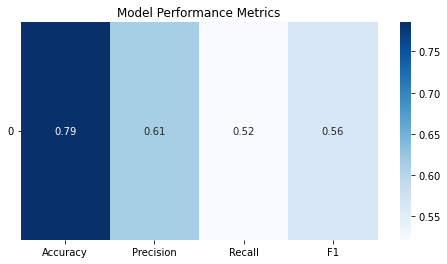

---------------------------------------------------------


In [31]:
#training the model using best parameters and checking the Performance of the model
best_params={'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50}
best_XGB=xgb.XGBClassifier(**best_params)
best_XGB.fit(X_train,y_train)
print("-------------------TRAIN PERFORMANCE--------------------")
y_pred_train=best_XGB.predict(X_train)
plot_metrics(y_train,y_pred_train)
print("---------------------------------------------------------")
print("-------------------TEST PERFORMANCE--------------------")
y_pred_test=best_XGB.predict(X_test)
plot_metrics(y_test,y_pred_test)
print("---------------------------------------------------------")


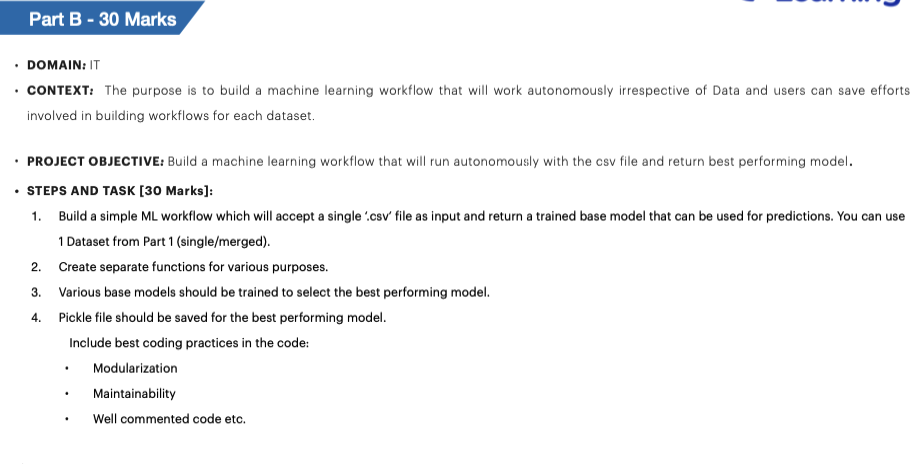

In [32]:
#Function to load data
def load_data(file1,file2):
    file_name1=file1
    file_name2=file2
    churn_df1=pd.read_csv(file_name1)
    churn_df2=pd.read_csv(file_name2)
    churn_df=pd.merge(churn_df1,churn_df2,on='customerID')
    return churn_df

In [33]:
#pre data analysis clean up
def prepare_data_for_analysis(churn_df):
    churn_df.drop(churn_df[churn_df.TotalCharges==' '].index,inplace=True)
    churn_df.TotalCharges=churn_df.TotalCharges.astype('float64')
    churn_df.SeniorCitizen=churn_df.SeniorCitizen.astype('category')
    churn_df.drop('customerID',inplace=True,axis=1)
    return churn_df
    

In [34]:
#data analysis
def getPie(data):#pie charts for categorical values
    for i in data.columns:
        if (data[i].dtype=='category' or data[i].dtype=='object'):
            plt.pie(data[i].value_counts(),labels=data[i].value_counts().index, autopct='%1.2f%%')
            plt.title(i.upper())
            plt.axis('equal')
            plt.show()
def getBar(data):#hist plots to know Charges Distribution
    for i in data.columns:
            sns.histplot(data=data,x=i,bins=50)
            plt.xlabel(i)
            plt.ylabel('Count')
            plt.title('Distribution of '+i)
            plt.show()
def getBox(data,hue):#box plots to know the distribution of timely data
    for i in data.drop(hue,axis=1).columns:
        sns.boxplot(data=data,x=hue,y=i)
        plt.xlabel(i)
        plt.title('Distribution of '+i)
        plt.show()   
def data_analysis(data):
    getPie(data)
    getBar(data[['TotalCharges','MonthlyCharges']])
    getBox(pd.DataFrame(data[['tenure','Churn']]),'Churn')
    

In [35]:
#data preprocessing
def change_type(data,prev="int64",to="float64"):# A function to change data type
    for i in data.select_dtypes(prev).columns:
        data[i]=data[i].astype(to)


def oneHotEncode(data,cols):# Defining a function to perform one hot encoding
    return pd.get_dummies(data,columns=cols)
def labelEncode(data,cols):# Defining a function to perform LabelEncoding
    le=LabelEncoder()
    for i in cols:
        le.fit(data[i])
        data[i]=le.transform(data[i])
def replaceStruct(data,mapping):#Defining a function to perform Replacement of the values using a map
    return data.replace(mapping)
def normalise(data,cols): #Defining a function to normalise the columns
    scaler=MinMaxScaler()
    for i in cols:
        data[i]=scaler.fit_transform(data[[i]])
def preproccess(df):# A collective master preprocessing function which returns a preprocessed dataframe ready to be used for training
    data=df
    #change types
    change_type(data,prev='object',to='category')
    change_type(data,prev='int64',to='float64')
    #one Hot encoding
    data=oneHotEncode(data,['InternetService','Contract','PaymentMethod'])
    
    
    #labelEncoding
    cols=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn']
    labelEncode(data,cols)
    
    #Replacing values
    replace_map={'MultipleLines': {'No phone service': 0, 'No': 0, 'Yes': 1},
 'OnlineSecurity': {'No': 0, 'Yes': 1, 'No internet service': 0},
 'OnlineBackup': {'Yes': 1, 'No': 0, 'No internet service': 0},
 'DeviceProtection': {'No': 0, 'Yes': 1, 'No internet service': 0},
 'TechSupport': {'No': 0, 'Yes': 1, 'No internet service': 0},
 'StreamingTV': {'No': 0, 'Yes': 1, 'No internet service': 0},
 'StreamingMovies': {'No': 0, 'Yes': 1, 'No internet service': 0}}
    
    data=replaceStruct(data,replace_map)
    change_type(data,prev='category',to='uint8')#memory reduction
    change_type(data,prev='int64',to='uint8') #memory reduction
    #normalizing numeric data
    normalise(data,['tenure', 'MonthlyCharges', 'TotalCharges'])
    return data
    
    


    

In [36]:
#splitting the data
def split_data(data,test,r_state,target): #Defining a function to perform train test split
    return train_test_split(data.drop(target,axis=1),data[target],test_size=test,random_state=r_state)
    
    

In [37]:
#model Building

def train_model(X_train,y_train,model_type): #Defining a function to train a single model with training data which returns a trained model
    if model_type=='dtree':
        model=DecisionTreeClassifier()
    elif model_type=='rfclass':
        model=RandomForestClassifier()
    elif model_type=='gbclass':
        model=GradientBoostingClassifier()
    elif model_type=='xgbclass':
        model=xgb.XGBClassifier()
    model.fit(X_train,y_train)
    return model
def train(X_train,y_train,models):# Defining a master train function to train all the 4 models and return a map which has keys as the string representation of the models and values as the trained models
    model_map={}
    for i in models:
        model_map[i]=train_model(X_train,y_train,i)
    return model_map
        
        
        

In [38]:
#model evaluation
# Defining a function which returns the best model string representation based on F1 score,
# as we are dealing with churn data F1 score metric plays a crucial role as reducing False positives and False Negatives is important.
def best_model(model_map,X_test,y_test):
    best_model=""
    best_f1=0
    for i in model_map.keys():
        y_pred=model_map[i].predict(X_test)
        f1=f1_score(y_test,y_pred)
        
        if f1>best_f1:
            best_model=i
            best_f1=f1
    print("Based on f1 score best model is {} with accuracy of {}".format(best_model,best_f1))
    plot_metrics(y_test,model_map[best_model].predict(X_test))
    return best_model
    
    

In [39]:
#Tuning
# This function returns the final model which is trained with best parameters and also prints best parameters
#This takes params of the model and scoring type to be used , X and y training data, best model string representation and model map where we have all the model string representaion mapped with base models
def return_tuned_model(params,score,best_model,X,y,model_map):
    grid_params=params
    grid_search=GridSearchCV(model_map[best_model],param_grid=grid_params,cv=5,n_jobs=-1,scoring=score)
    grid_search.fit(X,y)
    # Print best parameters and score
    print(f'Best parameters: {grid_search.best_params_}')
    print(f'Best score: {grid_search.best_score_:.4f}')
    final_model=model_map[best_model].set_params(**grid_search.best_params_)
    final_model.fit(X,y)
    return final_model


In [43]:
#Saving the best performing model in a pickle file
def save_model(best_model,filename):
    with open(filename,'wb') as f:
        pickle.dump(best_model,f)
 

In [44]:
#master function
def run_workflow(data):
    df=data
    
    #pre data analysis clean up
    df=prepare_data_for_analysis(df)
    
    #data analysis
    data_analysis(df)
    
    #data preprocessing
    df=preproccess(df)

    #Splitting data into train and test splits
    X_train,X_test,y_train,y_test=split_data(df,0.3,42,'Churn')
    
    #model building
    models=train(X_train,y_train,['dtree','rfclass','gbclass','xgbclass'])
    
    #model evaluation
    model=best_model(models,X_test,y_test)
    
    #tuning
    model_map={'dtree':DecisionTreeClassifier(random_state=42),'rfclass':RandomForestClassifier(random_state=42),'gbclass':GradientBoostingClassifier(random_state=42),'xgbclass':xgb.XGBClassifier(random_state=42)}
    param_map={
        'dtree':{
            
            'max_depth': [3, 5, 7],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': [None, 'sqrt', 'log2'],
              'criterion': ['gini', 'entropy']
        },
        'rfclass':{
            'n_estimators': [50, 100, 200],
              'max_depth': [3, 5, 7],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2'],
              'bootstrap': [True, False]
        },
        'gbclass':{
            'n_estimators': [50, 100, 200],
              'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 1.0],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2']
            
        },
        'xgbclass':{
            'n_estimators': [50, 100, 200],
              'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.1, 1.0],
              'subsample': [0.5, 0.75, 1.0],
              'colsample_bytree': [0.5, 0.75, 1.0],
              'reg_alpha': [0, 0.1, 1],
              'reg_lambda': [0, 0.1, 1],
              'gamma': [0, 0.1, 1]
        }
    }
    final_model=return_tuned_model(params=param_map[model],score='f1',best_model=model,model_map=model_map,X=X_train,y=y_train)
    plot_metrics(y_test,final_model.predict(X_test))
    #save the best performing model pickle file
    save_model(final_model,'final_model.pkl')




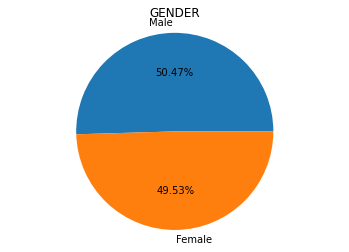

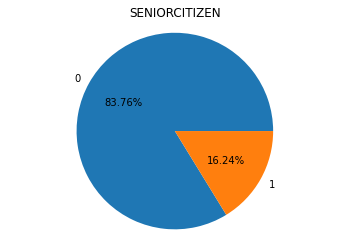

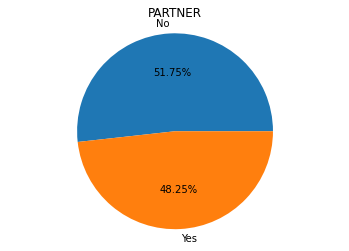

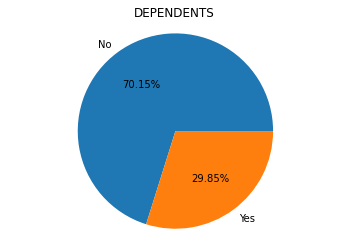

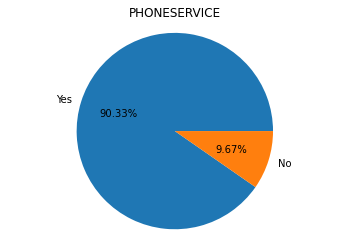

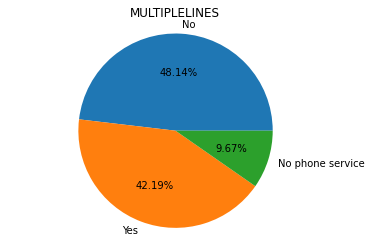

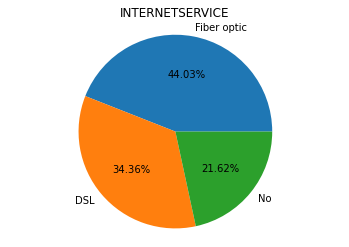

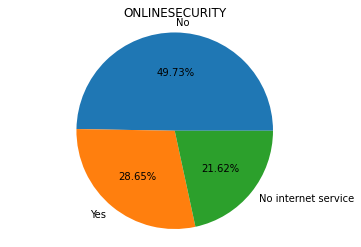

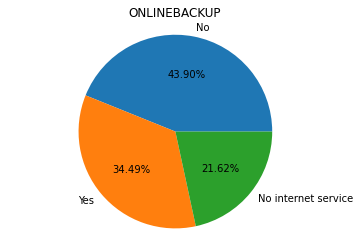

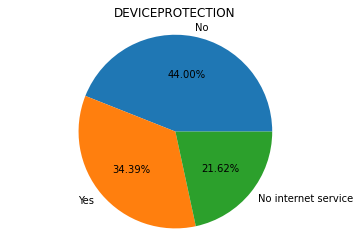

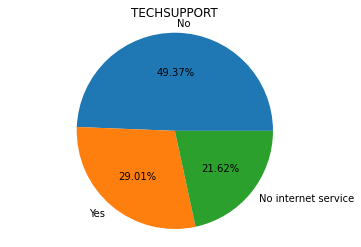

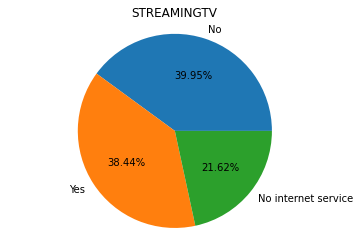

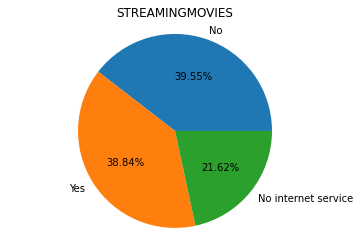

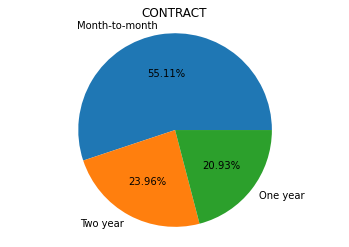

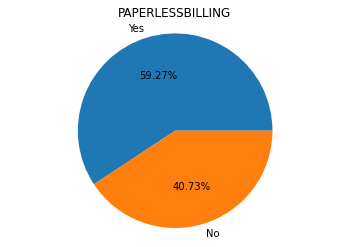

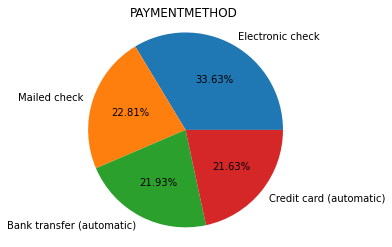

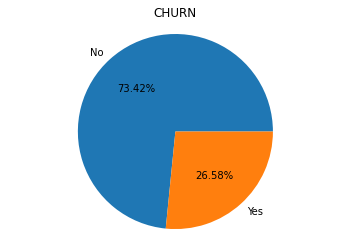

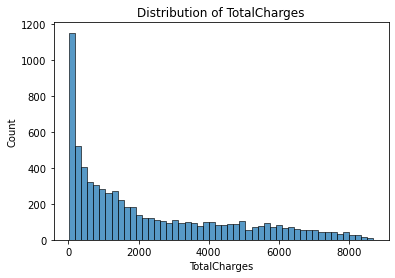

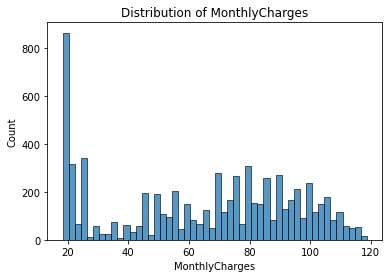

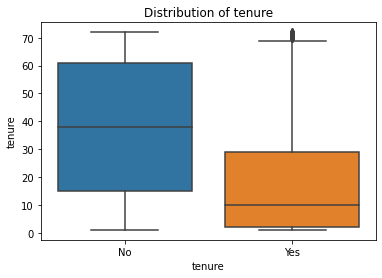

Based on f1 score best model is gbclass with accuracy of 0.5861386138613861


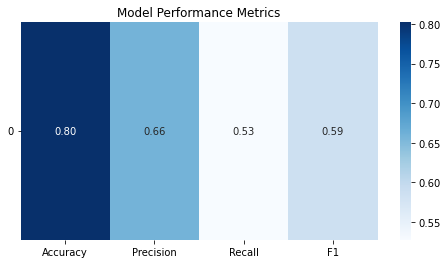

Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best score: 0.5988


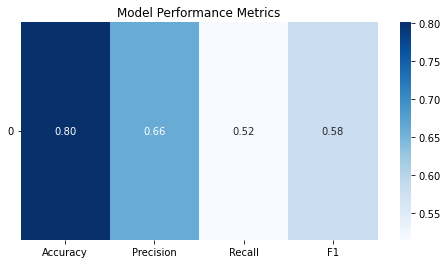

In [45]:
if __name__ == '__main__':
    merged_df=load_data('churn1.csv','churn2.csv')
    run_workflow(merged_df)